In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nitaandriani","key":"cf10c8f1d6f56a3b5bf803865777ee38"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:11<00:00, 247MB/s]
100% 2.29G/2.29G [00:11<00:00, 222MB/s]


In [ ]:
!unzip -q chest-xray-pneumonia.zip -d chest-xray-pneumonia

In [ ]:
!rm -rf datasets

!mkdir -p datasets/test
!mkdir -p datasets/train
!mkdir -p datasets/val

In [ ]:
!mv chest-xray-pneumonia/chest_xray/test/PNEUMONIA datasets/test/
!mv chest-xray-pneumonia/chest_xray/train/PNEUMONIA datasets/train/
!mv chest-xray-pneumonia/chest_xray/val/PNEUMONIA datasets/val/

!rm -rf chest-xray-pneumonia

In [ ]:
!kaggle datasets download -d samuel156/lungxrays-grayscale

Dataset URL: https://www.kaggle.com/datasets/samuel156/lungxrays-grayscale
License(s): unknown
100% 1.88G/1.89G [00:30<00:00, 79.2MB/s]
100% 1.89G/1.89G [00:30<00:00, 66.3MB/s]


In [ ]:
!unzip -q lungxrays-grayscale -d lungxrays-grayscale

!mv lungxrays-grayscale/LungXRays-grayscale/test/Corona\ Virus\ Disease datasets/test/COVID19
!mv lungxrays-grayscale/LungXRays-grayscale/train/Corona\ Virus\ Disease datasets/train/COVID19
!mv lungxrays-grayscale/LungXRays-grayscale/val/Corona\ Virus\ Disease datasets/val/COVID19

!mv lungxrays-grayscale/LungXRays-grayscale/test/Tuberculosis datasets/test/TUBERCULOSIS
!mv lungxrays-grayscale/LungXRays-grayscale/train/Tuberculosis datasets/train/TUBERCULOSIS
!mv lungxrays-grayscale/LungXRays-grayscale/val/Tuberculosis datasets/val/TUBERCULOSIS

!mv lungxrays-grayscale/LungXRays-grayscale/test/Normal datasets/test/NORMAL
!mv lungxrays-grayscale/LungXRays-grayscale/train/Normal datasets/train/NORMAL
!mv lungxrays-grayscale/LungXRays-grayscale/val/Normal datasets/val/NORMAL

!rm -rf lungxrays-grayscale

In [ ]:
!sudo pip3 install tensorflowjs

  Using cached tensorflowjs-4.22.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorflow_decision_forests-1.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
  Using cached tf_keras-2.18.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflowjs-4.22.0-py3-none-any.whl (89 kB)
Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.3 MB)
Using cached tensorflow_decision_forests-1.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.9 MB)
Using cached tf_keras-2.18.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-2.17.0:
      Successfully uninstalled tf_k

In [ ]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.regularizers import l2

In [ ]:
labels = ['COVID19', 'TUBERCULOSIS', 'PNEUMONIA', 'NORMAL']
img_size = 150

def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                # Reshape the image to have an explicit channel dimension
                resized_arr = resized_arr.reshape(img_size, img_size, 1)
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object) # Specify dtype=object to handle varying shapes

In [ ]:
train = get_training_data('/content/datasets/train')
test = get_training_data('/content/datasets/test')
val = get_training_data('/content/datasets/val')

<Axes: ylabel='count'>

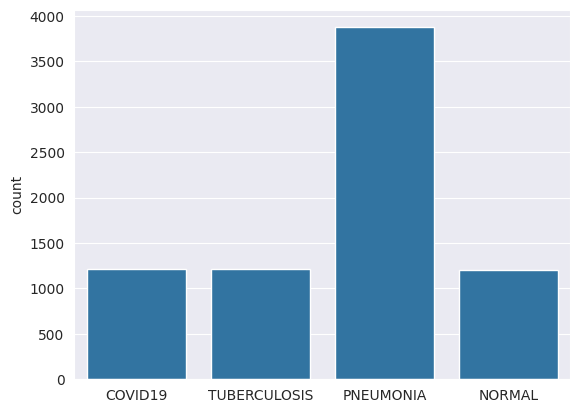

In [ ]:
l = []
for i in train:
    label_name = labels[i[1]]
    l.append(label_name)

sns.set_style('darkgrid')
sns.countplot(x=l)

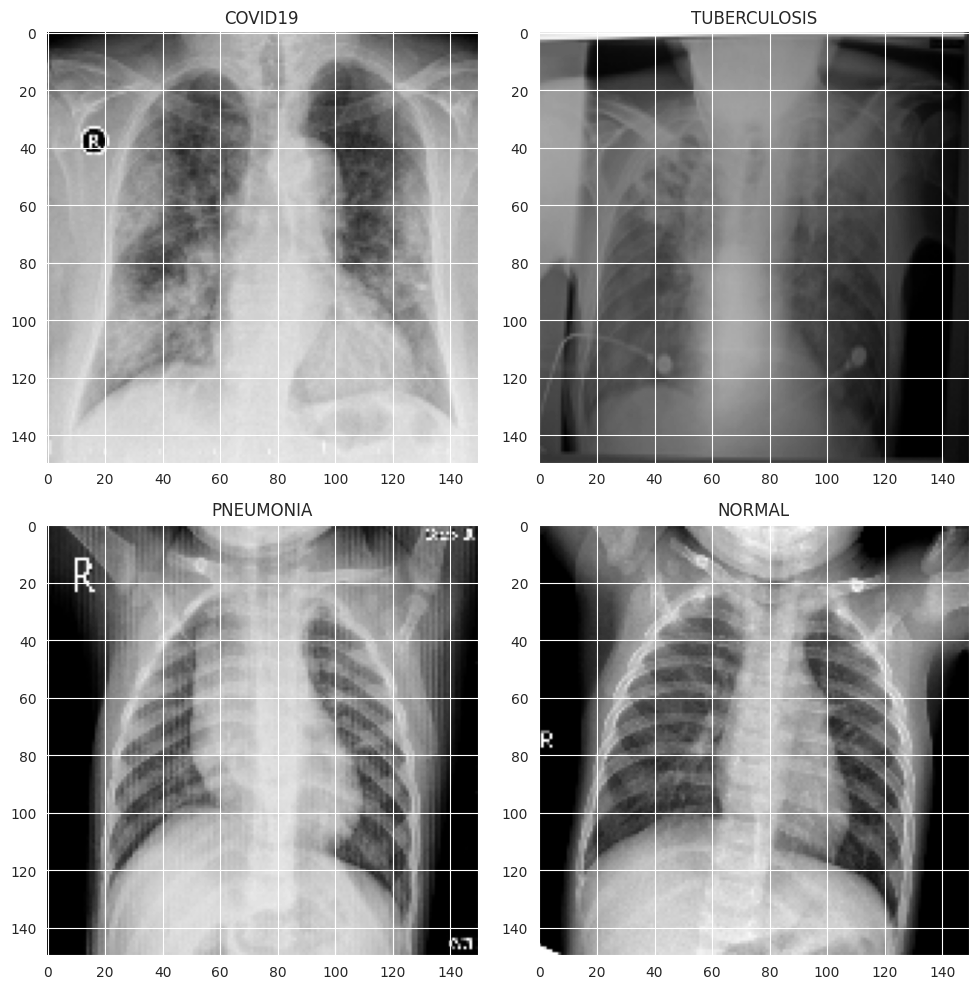

In [ ]:
plt.figure(figsize=(10, 10))

for i, label in enumerate(labels):
    for data in train:
        if data[1] == i:
            plt.subplot(2, 2, i+1)
            plt.imshow(data[0].reshape(img_size, img_size), cmap='gray')
            plt.title(label)
            break

plt.tight_layout()
plt.show()

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
x_val = x_val.reshape(-1, img_size, img_size, 1)
x_test = x_test.reshape(-1, img_size, img_size, 1)

y_train = to_categorical(y_train, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (7518, 150, 150, 1)
y_train shape: (7518, 4)


In [ ]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    Conv2D(3, (3, 3), padding="same", activation="relu", input_shape=(150, 150, 1)),
    BatchNormalization(),  # Menambahkan BatchNormalization
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(4, activation='softmax', kernel_regularizer=l2(0.01))
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

<ipython-input-57-e484ed432de9>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 150, 150, 3)         │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 150, 150, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,510 (9.24 MB)

 Trainable params: 164,520 (642.66 KB)

 Non-trainable params: 2,257,990 (8.61 MB)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs = 10,
                    validation_data = datagen.flow(x_val, y_val), callbacks = [learning_rate_reduction])

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.8796 - loss: 0.4764 - val_accuracy: 0.8470 - val_loss: 0.5551 - learning_rate: 0.0010
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.8723 - loss: 0.4876 - val_accuracy: 0.8920 - val_loss: 0.4568 - learning_rate: 0.0010
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.8790 - loss: 0.4662 - val_accuracy: 0.8314 - val_loss: 0.5871 - learning_rate: 0.0010
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.8681 - loss: 0.4707 - val_accuracy: 0.8977 - val_loss: 0.4366 - learning_rate: 0.0010
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.8872 - loss: 0.4492 - val_accuracy: 0.8347 - val_loss: 0.5718 - learning_rate: 0.0010
Epoch 6/10
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8856 - loss: 0.4418
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.8856 - los

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9082 - loss: 0.3907
Loss of the model is -  0.3429747521877289
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9082 - loss: 0.3907
Accuracy of the model is -  91.85323119163513 %


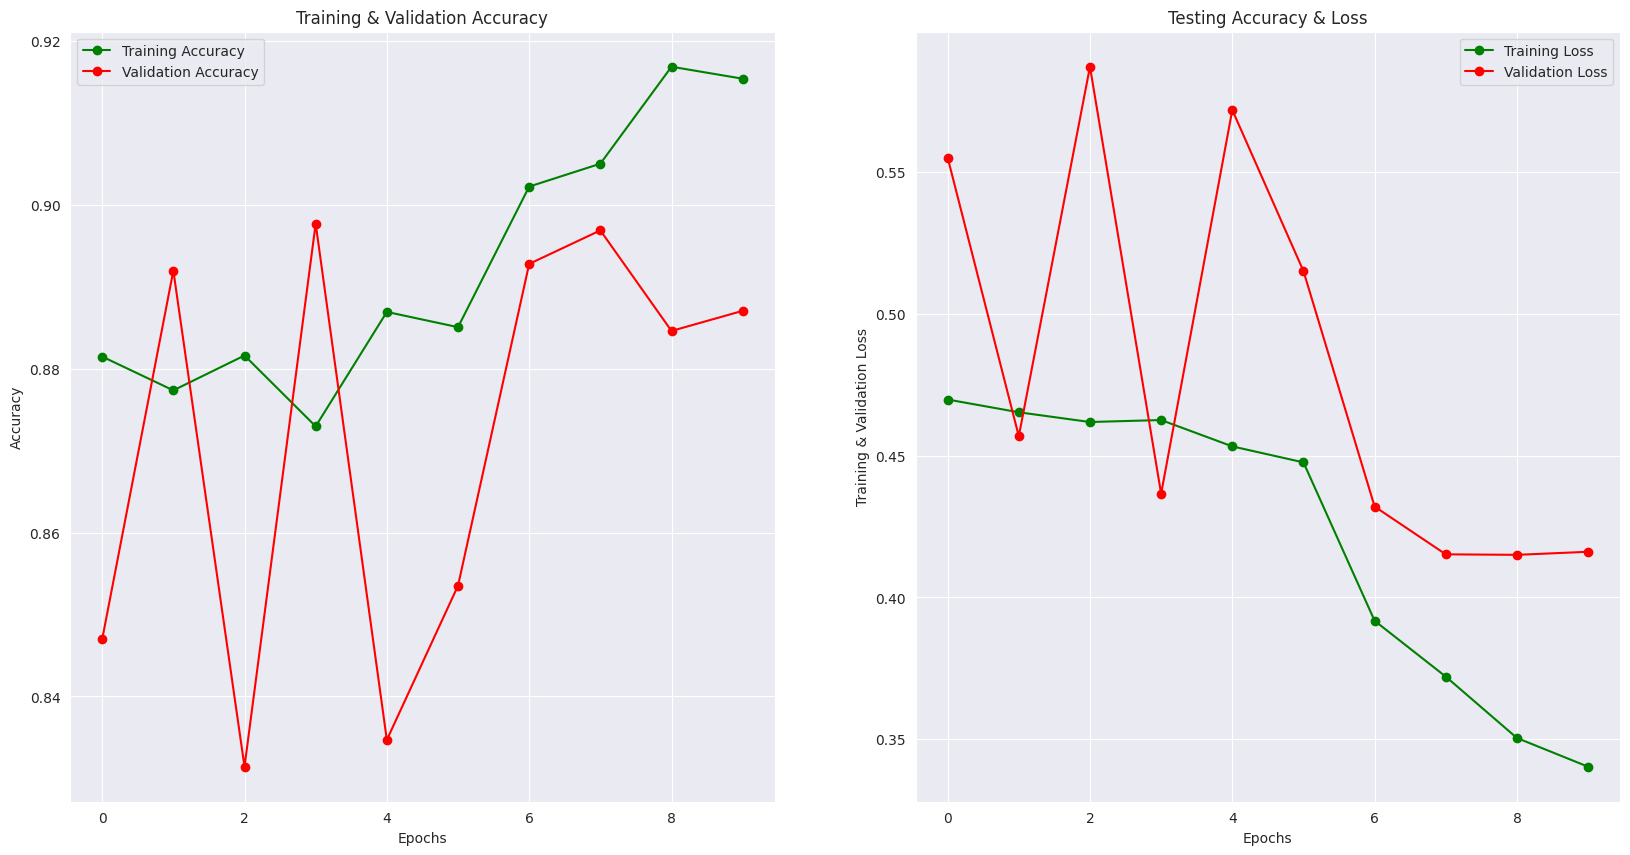

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i for i in range(len(train_acc))]

fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = model.predict(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step


array([9.62570131e-01, 1.66440178e-02, 5.66640683e-03, 1.51194576e-02,
       9.31995690e-01, 3.23879602e-03, 6.35097548e-02, 1.25579303e-03,
       9.89995480e-01, 8.77835881e-03, 1.02088656e-04, 1.12408260e-03,
       9.96252656e-01, 3.30344075e-03, 1.40406002e-04], dtype=float32)

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=1)
y_test_indices = np.argmax(y_test, axis=1)

print(classification_report(y_test_indices, predictions, target_names=labels))

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
              precision    recall  f1-score   support

     COVID19       0.91      0.91      0.91       407
TUBERCULOSIS       0.99      0.87      0.93       407
   PNEUMONIA       0.88      0.93      0.90       390
      NORMAL       0.90      0.97      0.93       404

    accuracy                           0.92      1608
   macro avg       0.92      0.92      0.92      1608
weighted avg       0.92      0.92      0.92      1608



In [ ]:
cm = confusion_matrix(y_test_indices, predictions)
cm = pd.DataFrame(cm, index=labels, columns=labels)

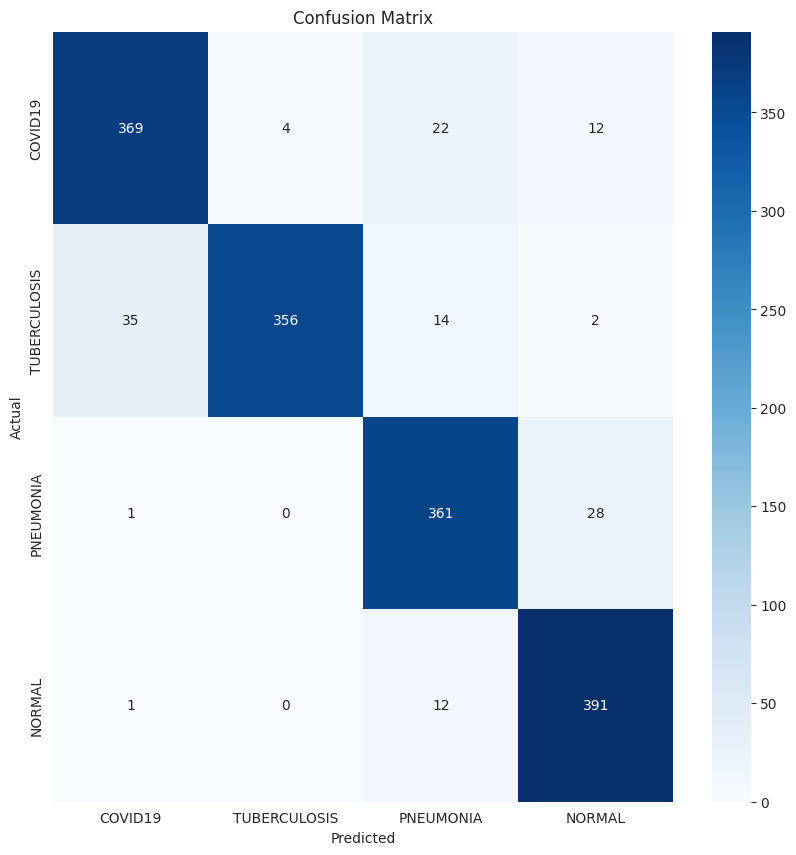

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_test_indices = np.argmax(y_test, axis=1)

correct = np.nonzero(predictions == y_test_indices)[0]
incorrect = np.nonzero(predictions != y_test_indices)[0]

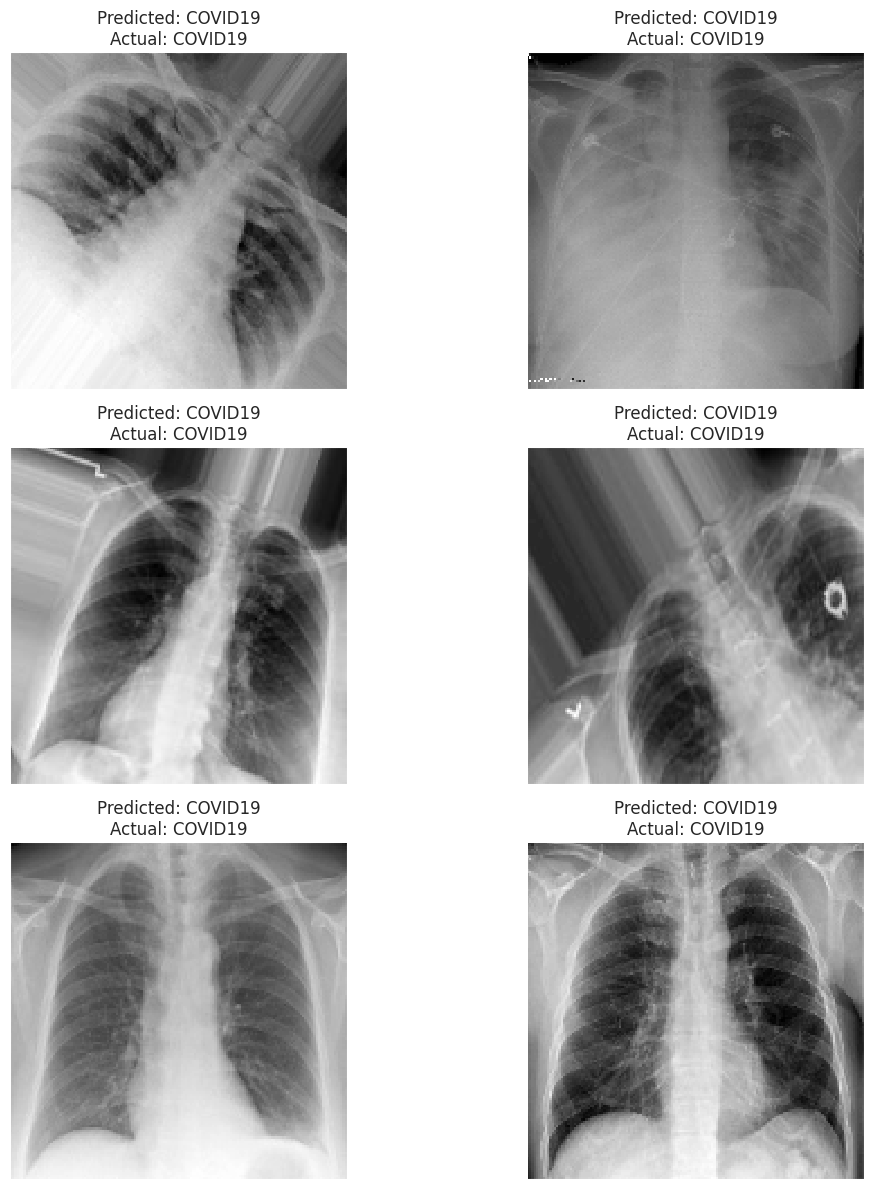

In [ ]:
plt.figure(figsize=(12, 12))
i = 0
for c in correct[:6]:
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150, 150), cmap="gray", interpolation='none')
    plt.title(f"Predicted: {labels[predictions[c]]}\nActual: {labels[y_test_indices[c]]}")
    i += 1
    if i == 6:
        break
plt.tight_layout()
plt.show()

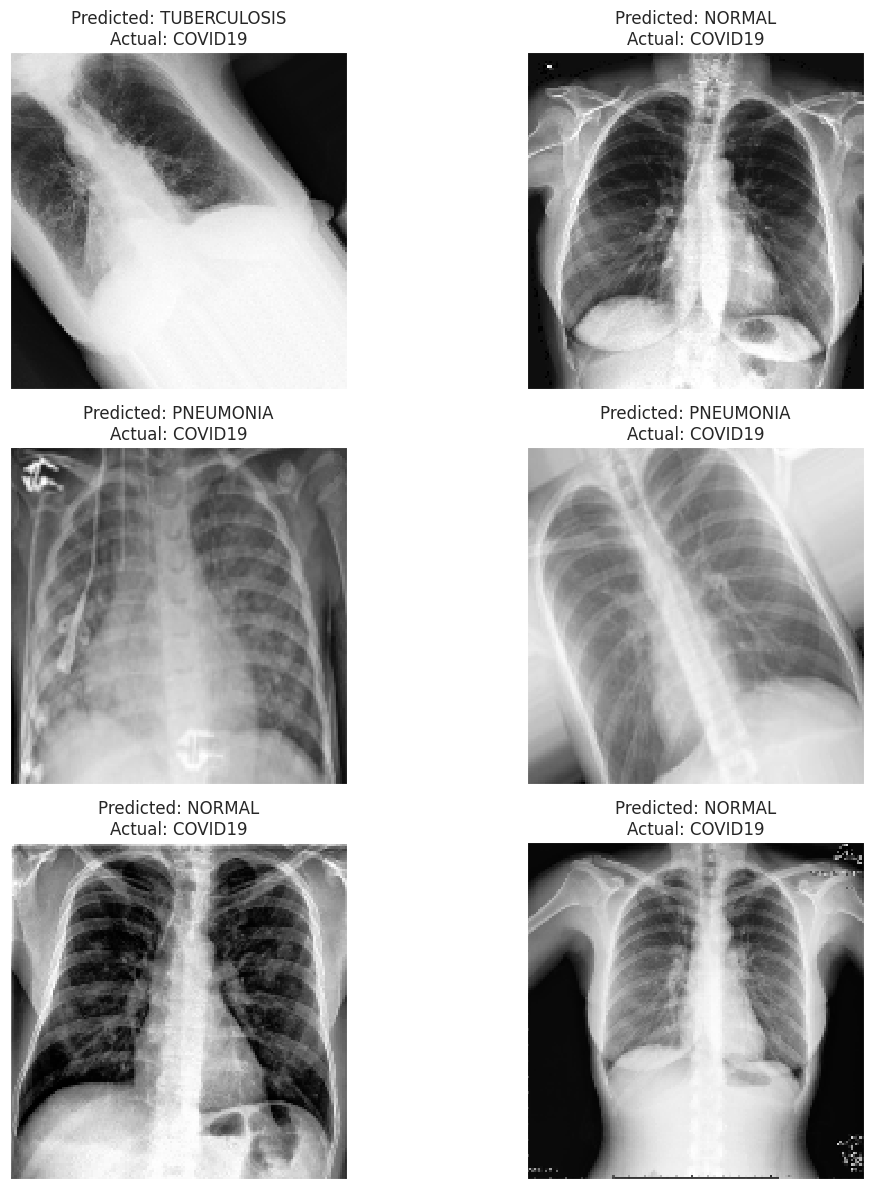

In [ ]:
plt.figure(figsize=(12, 12))
i = 0
for c in incorrect[:6]:
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150, 150), cmap="gray", interpolation='none')
    plt.title(f"Predicted: {labels[predictions[c]]}\nActual: {labels[y_test_indices[c]]}")
    i += 1
    if i == 6:
        break
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

# Membaca gambar yang diunggah
uploaded_image_path = "/content/" + str(list(uploaded.keys())[0])
uploaded_image = cv2.imread(uploaded_image_path)

# Mengonversi gambar menjadi grayscale dan menormalkannya
uploaded_image_gray = cv2.cvtColor(uploaded_image, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(uploaded_image_gray, (150, 150))  # Sesuaikan dengan ukuran input model

# Normalisasi gambar dengan membaginya dengan 255
resized_image_normalized = resized_image / 255.0

# Menambahkan dimensi agar sesuai dengan input model (batch_size, 150, 150, 1)
resized_image_normalized = resized_image_normalized.reshape(1, 150, 150, 1).astype(np.float32)

# Melakukan prediksi
predictions = model.predict(resized_image_normalized)
predicted_class = np.argmax(predictions, axis=1)[0]

print("Predicted Class:", labels[predicted_class])
print("Prediction Scores:", predictions)

Saving 162tbc.jpg to 162tbc.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class: TUBERCULOSIS
Prediction Scores: [[0.27818993 0.67192245 0.04213592 0.00775173]]


In [ ]:
model.save('./pcd.h5')
model = tf.keras.models.load_model('./pcd.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
tflite_model = converter.convert()
open("./pcd.tflite", "wb").write(tflite_model)

Saved artifact at '/tmp/tmpgsy56ja3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 1), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  137253029225120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137253029230048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137253030142800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137253030144912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137253030138224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137253030140512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137254185045504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137254185056944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137254185075632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137254185052368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1372541850546

2670528

In [ ]:
!tensorflowjs_converter --input_format=keras ./pcd.h5 ./pcd_saved_model

2024-12-12 08:42:50.888458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733992970.912479    8709 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733992970.921538    8709 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
!zip -r ./pcd_saved_model.zip ./pcd_saved_model

  adding: pcd_saved_model/ (stored 0%)
  adding: pcd_saved_model/group1-shard1of3.bin (deflated 7%)
  adding: pcd_saved_model/group1-shard2of3.bin (deflated 7%)
  adding: pcd_saved_model/group1-shard3of3.bin (deflated 7%)
  adding: pcd_saved_model/model.json (deflated 97%)
